# 1. Imports

In [1]:
import os
import glob
import numpy as np
import pandas as pd
from datetime import timedelta, date
import matplotlib.pyplot as pl
%matplotlib inline
import itertools

# 2. Functions

In [2]:
# https://github.com/open-risk/concentrationMetrics
def hhi(data, normalized=True, ci=None, samples=None):
    """ Calculate the Herfindahl-Hirschman index
    :param data: Positive data
    :type data: numpy array
    :return: HHI (Float)
    `Open Risk Manual Entry for Hirschman-Herfindahl Index <https://www.openriskmanual.org/wiki/Herfindahl-Hirschman_Index>`_
    """
    # Normalize the data
    weights = get_weights(data)
    n = weights.size
    # Compute the HHI
    if n == 0:
        return 0
    else:
        h = np.square(weights).sum()
        if normalized:
            return (h - 1.0 / n) / (1.0 - 1.0 / n)
        else:
            return h
        
def get_weights(data):
    """ Calculate data weights
    :param data: Positive data of weights
    :type data: numpy array
    :return: Vector weights
    :raise: TypeError if negative total size
    """
    try:
        # select the first column only
        if len(data.shape) > 1:
            data = data[:, 0]
        # print(data)
    except:
        print("Data is not in numpy format")
        exit()
    ts = np.sum(data)
    if ts <= 0:
        raise TypeError('Input data vector must have positive values')
        exit()
    else:
        return np.true_divide(data, ts)

# 3. Load data

## 3.1 LACNIC

In [3]:
path_to_addr_space = '../../data/processed/origin_addr_space/lacnic'
files_addr_space = glob.glob(path_to_addr_space + '/*')
files_addr_space = np.sort(files_addr_space)

In [4]:
lacnic_addr_space = pd.read_csv(
    files_addr_space[-1],
    header='infer',
    sep=','
)

## 3.2 outside LACNIC

In [5]:
path_to_addr_space = '../../data/processed/origin_addr_space/ripe'
files_addr_space = glob.glob(path_to_addr_space + '/*')
files_addr_space = np.sort(files_addr_space)

In [6]:
ripe_addr_space = pd.read_csv(
    files_addr_space[-1],
    header='infer',
    sep=','
)

In [7]:
path_to_addr_space = '../../data/processed/origin_addr_space/apnic'
files_addr_space = glob.glob(path_to_addr_space + '/*')
files_addr_space = np.sort(files_addr_space)

In [8]:
apnic_addr_space = pd.read_csv(
    files_addr_space[-1],
    header='infer',
    sep=','
)

In [9]:
path_to_addr_space = '../../data/processed/origin_addr_space/afrinic'
files_addr_space = glob.glob(path_to_addr_space + '/*')
files_addr_space = np.sort(files_addr_space)

In [10]:
afrinic_addr_space = pd.read_csv(
    files_addr_space[-1],
    header='infer',
    sep=','
)

# 4. Compute HHI

## 4.1 LACNIC

In [11]:
output_list = []
for cc in lacnic_addr_space.drop_duplicates('cc')['cc'].values:
    cc_df = lacnic_addr_space.loc[
        lacnic_addr_space['cc'] == cc
    ]
    total_country = cc_df.loc[cc_df['cc'] == cc]['ip-cnt'].sum()
    cc_df['ip-frac'] = cc_df['ip-cnt'].values / float(total_country)
    output_list.append((cc, total_country, hhi(cc_df['ip-frac'].values)))

/home/carisimo/latam-ixp-obs/latam-ixp-obs/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [12]:
hhi_df = pd.DataFrame(
    output_list,
    columns=[
        'cc',
        'total',
        'metric',
    ]
)
hhi_df = hhi_df.sort_values('metric', ascending=False)
hhi_df.head()

,cc,total,metric
6,SR,80896,0.889441
28,AW,61952,0.853061
1,UY,2382592,0.812280
14,GY,67072,0.683403
7,PY,1104640,0.541007


## 4.2 outside LACNIC

In [13]:
output_list = []
for cc in ['FR', 'DE']:
    cc_df = ripe_addr_space.loc[
        ripe_addr_space['cc'] == cc
    ]
    total_country = cc_df.loc[cc_df['cc'] == cc]['ip-cnt'].sum()
    cc_df['ip-frac'] = cc_df['ip-cnt'].values / float(total_country)
    output_list.append((cc, total_country, hhi(cc_df['ip-frac'].values)))
for cc in ['ZA', ]:
    cc_df = afrinic_addr_space.loc[
        afrinic_addr_space['cc'] == cc
    ]
    total_country = cc_df.loc[cc_df['cc'] == cc]['ip-cnt'].sum()
    cc_df['ip-frac'] = cc_df['ip-cnt'].values / float(total_country)
    output_list.append((cc, total_country, hhi(cc_df['ip-frac'].values)))
for cc in ['TH', ]:
    cc_df = apnic_addr_space.loc[
        apnic_addr_space['cc'] == cc
    ]
    total_country = cc_df.loc[cc_df['cc'] == cc]['ip-cnt'].sum()
    cc_df['ip-frac'] = cc_df['ip-cnt'].values / float(total_country)
    output_list.append((cc, total_country, hhi(cc_df['ip-frac'].values)))

/home/carisimo/latam-ixp-obs/latam-ixp-obs/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/carisimo/latam-ixp-obs/latam-ixp-obs/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/carisimo/latam-ixp-obs/latam-ixp-obs/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [14]:
hhi_extra_df = pd.DataFrame(
    output_list,
    columns=[
        'cc',
        'total',
        'metric',
    ]
)
hhi_extra_df = hhi_extra_df.sort_values('metric', ascending=False)
hhi_extra_df

,cc,total,metric
0,FR,71109042,0.140335
1,DE,104086608,0.120280
3,TH,10378752,0.065572
2,ZA,27320848,0.056668


In [15]:
# v = []
# for cc in delegated_addr_space_by_as_cc_df.drop_duplicates('cc')['cc'].values:
#     cc_df = delegated_addr_space_by_as_cc_df.loc[
#         delegated_addr_space_by_as_cc_df['cc'] == cc]
#     total_country = cc_df.loc[cc_df['cc'] == cc]['ip-cnt'].sum()
#     cc_df['ip-frac'] = cc_df['ip-cnt'].values / float(total_country)
#     v.append(cc_df['ip-frac'].values)
# v = np.array(v)

# 5. Plot

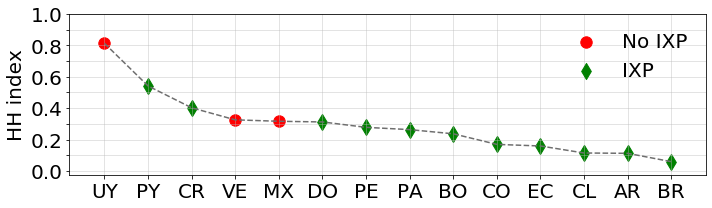

In [16]:
COUNTRY_ADDR_SPACE_THRESHOLD = 1e6
fig, ax1 = pl.subplots(1, figsize=(10, 3))
ax1.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5)
ax1.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5)
ax1.plot(
    np.arange(
        1,
        hhi_df.loc[
            hhi_df['total'] > COUNTRY_ADDR_SPACE_THRESHOLD
        ]['metric'].size + 1
    ),
    hhi_df.loc[
        hhi_df['total'] > COUNTRY_ADDR_SPACE_THRESHOLD
    ]['metric'].values,
    color='#6E6E6E',
    linestyle='--'
)
ax1.scatter(
    (1,4,5),
    hhi_df.loc[
        hhi_df['total'] > COUNTRY_ADDR_SPACE_THRESHOLD
    ]['metric'].values[[0,3,4]],
    s=130,
    marker='o',
    c='red',
    label='No IXP'
)
ax1.scatter(
    [2,3, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    hhi_df.loc[
        hhi_df['total'] > COUNTRY_ADDR_SPACE_THRESHOLD
    ]['metric'].values[[ 1,2, 5, 6, 7, 8, 9, 10, 11, 12, 13]],
    s=130,
    marker='d',
    c='green',
    label='IXP'
)


ax1.set_xticks(
    np.arange(
        1,
        hhi_df.loc[
            hhi_df['total'] > COUNTRY_ADDR_SPACE_THRESHOLD
        ]['metric'].size + 1),
    minor=False
)
ax1.set_xticklabels(
    hhi_df.loc[
        hhi_df['total'] > COUNTRY_ADDR_SPACE_THRESHOLD
    ]['cc'].values,
    rotation=0,
    minor=False,
    ha='center',
    fontsize=14
)
# ax1.set_yscale('log')
ax1.set_yticks(np.arange(0, 1.01, 0.1), minor=False)
ylabels_list = []
for i in np.arange(0, 1.0001, 0.1):
    if (np.floor(i*10))%2==0:
        ylabels_list.append(str('%.1f'%i))
    else:
        ylabels_list.append('')

ax1.set_yticklabels(ylabels_list, minor=False)
ax1.set_ylabel('HH index', fontsize=20)
ax1.tick_params(labelsize=20)
ax1.legend(loc='upper right', ncol=1, frameon=False, fontsize=20)
fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig('../../figures/hh.pdf')

# 6. Looking some countries in detail

In [21]:
for cc in ['UY', 'VE', 'CR', 'MX']:
    cc_df = lacnic_addr_space[lacnic_addr_space['cc'] == cc]
    total_country = cc_df.loc[cc_df['cc'] == cc]['ip-cnt'].sum()
    cc_df['ip-frac'] = cc_df['ip-cnt'].values / float(total_country)
    print("-----------")
    print("country's total: %s" % total_country)
    print(cc_df.head(2))

-----------
country's total: 2382592
    cc origin-asn   ip-cnt   ip-frac
83  UY       6057  2154496  0.904266
84  UY      19422    90112  0.037821
-----------
country's total: 5147136
   cc origin-asn   ip-cnt   ip-frac
0  VE       8048  2846208  0.552969
1  VE       6306   628736  0.122153
-----------
country's total: 2423072
      cc origin-asn   ip-cnt   ip-frac
1049  CR      11830  1515520  0.625454
1050  CR      52228   196608  0.081140
-----------
country's total: 24904608
     cc origin-asn    ip-cnt   ip-frac
419  MX       8151  13736736  0.551574
420  MX      13999   2046976  0.082193


/home/carisimo/latam-ixp-obs/latam-ixp-obs/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
